# Load the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


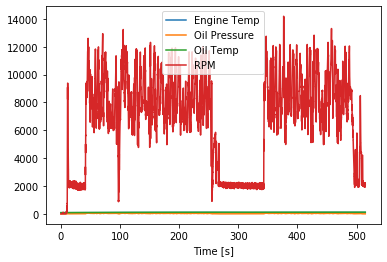

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


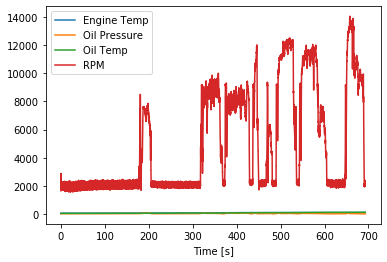

In [3]:
from load_data import load_windarab_log

column_labels = ['Time', 'Engine Temp', 'Oil Pressure', 'Oil Temp', 'RPM']


# good oil pressure in this log
data1_path = "data/STT1_data_log.txt"
data1_df = load_windarab_log(data1_path, column_labels, True)

# bad oil pressure in this log
data2_path = "data/ford_data_log.txt"
data2_df = load_windarab_log(data2_path, column_labels, True)

# Find a period of good oil pressure

In order to test and check the correctness of our model, we need to know when the data is good or bad. We separate the good and the bad oil pressure by looking at how different the two curves are, if they are similar, it means that the oil pressure is good, if the curves offset, it means the oil pressure is bad.

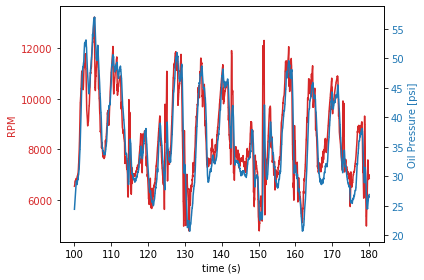

In [4]:
data1_df[100:200]

data1_start_time = 100
data1_end_time = 180

#plt.plot(data1_df[data1_start_time:data1_end_time].index, data1_df[data1_start_time:data1_end_time]["Oil Pressure"])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('RPM', color=color)
ax1.plot(data1_df[data1_start_time:data1_end_time].index, data1_df[data1_start_time:data1_end_time]["RPM"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Oil Pressure [psi]', color=color)  # we already handled the x-label with ax1
ax2.plot(data1_df[data1_start_time:data1_end_time].index, data1_df[data1_start_time:data1_end_time]["Oil Pressure"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Find a period of bad oil pressure

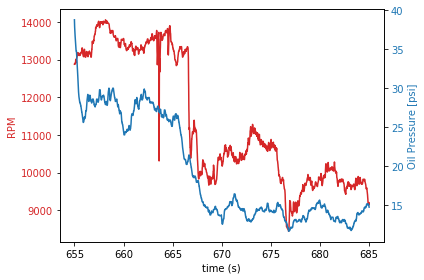

In [5]:
data2_start_time = 655
data2_end_time = 685

#plt.plot(data1_df[data1_start_time:data1_end_time].index, data1_df[data1_start_time:data1_end_time]["Oil Pressure"])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('RPM', color=color)
ax1.plot(data2_df[data2_start_time:data2_end_time].index, data2_df[data2_start_time:data2_end_time]["RPM"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Oil Pressure [psi]', color=color)  # we already handled the x-label with ax1
ax2.plot(data2_df[data2_start_time:data2_end_time].index, data2_df[data2_start_time:data2_end_time]["Oil Pressure"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Feature Vectors

In [6]:
# using the time periods discovered above, here we create dataframes only containing information
# from those periods
df_good = data1_df[data1_start_time:data1_end_time]
df_bad = data2_df[data2_start_time:data2_end_time]

In [9]:
# create a new column named 'flag' that will hold a one or a zero, depending on if the data is bad or good
df_good.insert(4, "Flag", 0) 
df_bad.insert(4, "Flag", 1)

In [10]:
# combine both data frames into one that we can shuffle.
df_all = pd.concat([df_good, df_bad])

from sklearn.utils import shuffle
df_all = shuffle(df_all)

df_all.head()

,Engine Temp,Oil Pressure,Oil Temp,RPM,Flag
Time,,,,,
131.10,101.6,21.7,112.4,4990.0,0
141.63,102.5,46.4,114.0,10660.0,0
105.17,100.0,55.7,110.0,12787.0,0
171.23,104.3,43.8,116.2,10806.0,0
111.06,100.6,48.2,110.6,11019.0,0


In [11]:
# create the feature vectors by pulling out the unecessary data and turning them into arrays
features_df = df_all.drop('Flag', axis=1)
labels_df = df_all.drop(['Engine Temp', 'Oil Pressure', 'Oil Temp', 'RPM'], axis=1)
feature_vectors = np.asarray(features_df)
label_vectors = np.asarray(labels_df)

In [12]:
# perform a train-test split on the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_vectors, label_vectors, test_size=0.25, random_state=42)

# this ensures that the data is in the correct format for the model training and testing
y_train = y_train.ravel()
y_test = y_test.ravel()